<a href="https://colab.research.google.com/github/Arshadfarazusmani/crop-disease-classification2/blob/main/Test_Crop_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install tensorflow


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

2025-05-01 08:52:40.685870: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-01 08:52:43.565446: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-01 08:52:44.878614: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746089565.183217    2557 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746089565.314173    2557 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746089566.082421    2557 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [3]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# test image pre_processing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/home/codespace/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/Data_set/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17570 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tom

2025-05-01 08:59:32.673659: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


# load model

In [5]:

cnn = tf.keras.models.load_model('/home/codespace/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/model/PlantDiseaseModel.keras')

In [6]:
! pip install opencv-python

In [7]:
! pip install opencv-contrib-python

In [8]:
! sudo apt-get update

Hit:1 https://dl.yarnpkg.com/debian stable InRelease
Get:2 https://packages.microsoft.com/repos/microsoft-ubuntu-focal-prod focal InRelease [3632 B]
Hit:3 https://repo.anaconda.com/pkgs/misc/debrepo/conda stable InRelease       
Get:4 https://packages.microsoft.com/repos/microsoft-ubuntu-focal-prod focal/main amd64 Packages [350 kB]
Hit:5 https://packagecloud.io/github/git-lfs/ubuntu focal InRelease            
Hit:6 http://archive.ubuntu.com/ubuntu focal InRelease              
Get:7 http://archive.ubuntu.com/ubuntu focal-updates InRelease [128 kB]
Get:8 http://security.ubuntu.com/ubuntu focal-security InRelease [128 kB]
Get:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease [128 kB]
Get:10 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1308 kB]
Get:11 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [4850 kB]
Get:12 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [4358 kB]
Get:13 http://archive.ubuntu.com/ubu

In [9]:
! sudo apt-get install -y libgl1

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgl1 is already the newest version (1.3.2-1~ubuntu0.20.04.2).
0 upgraded, 0 newly installed, 0 to remove and 55 not upgraded.


In [ ]:
import cv2
print(cv2.__version__)

4.11.0


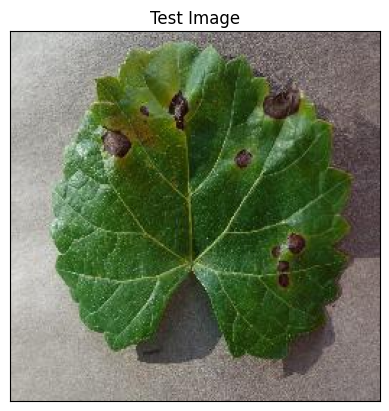

In [16]:
#Test Image Visualization
import cv2
image_path = '/home/codespace/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/test_images/grape_black_rot.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()


In [17]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


In [18]:
print(predictions)

[[3.3605065e-08 1.1476820e-06 3.6874752e-07 7.5221251e-09 3.9334997e-09
  5.4912150e-09 3.5489673e-09 5.2450042e-07 7.2108208e-11 2.7893381e-09
  1.5564362e-11 9.9963248e-01 3.3042167e-04 1.2925617e-05 2.2765663e-08
  2.7612090e-09 5.7155716e-09 5.3881466e-10 1.6569405e-06 7.8449719e-10
  7.6996370e-10 6.6804159e-07 1.4634829e-09 1.0040903e-08 3.9252909e-10
  2.0448339e-09 2.8083829e-07 8.7416936e-09 3.7928899e-08 1.8741721e-05
  8.3830955e-08 1.1628267e-09 3.5342987e-07 1.3642774e-09 1.4193846e-07
  2.0254303e-08 1.2383350e-09 4.9068150e-10]]


In [19]:
result_index = np.argmax(predictions)
print(result_index)

11


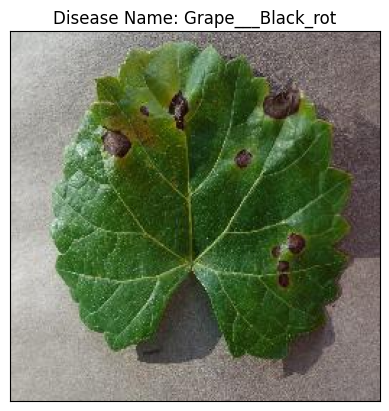

In [20]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()